In [ ]:
import numpy as np
import pandas as pd
from numpy import linalg as LA
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
import csv
from collections import defaultdict
import time
import sklearn
from  sklearn import metrics
import math
from sklearn.metrics import plot_confusion_matrix
random_state = 35
%matplotlib inline

In [ ]:
# считаем данные из файла в pandas DataFrame
df = pd.read_csv("weatherAUS.csv")
df = df.drop(['RISK_MM'], axis=1) #читерский признак
df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,WNW,20.0,24.0,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,WSW,4.0,22.0,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,WSW,19.0,26.0,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,E,11.0,9.0,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,NW,7.0,20.0,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


In [ ]:
df.count(axis=0)

Date             142193
Location         142193
MinTemp          141556
MaxTemp          141871
Rainfall         140787
Evaporation       81350
Sunshine          74377
WindGustDir      132863
WindGustSpeed    132923
WindDir9am       132180
WindDir3pm       138415
WindSpeed9am     140845
WindSpeed3pm     139563
Humidity9am      140419
Humidity3pm      138583
Pressure9am      128179
Pressure3pm      128212
Cloud9am          88536
Cloud3pm          85099
Temp9am          141289
Temp3pm          139467
RainToday        140787
RainTomorrow     142193
dtype: int64

In [ ]:
df.corr()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
MinTemp,1.000000,0.736267,0.104255,0.467261,0.072961,0.177285,0.176005,0.175749,-0.234211,0.005999,-0.451260,-0.461623,0.077625,0.020489,0.901813,0.708865
MaxTemp,0.736267,1.000000,-0.074839,0.588915,0.469967,0.067690,0.014680,0.050800,-0.505432,-0.509270,-0.332293,-0.427279,-0.289865,-0.279053,0.887020,0.984562
Rainfall,0.104255,-0.074839,1.000000,-0.064549,-0.227525,0.133497,0.086816,0.057759,0.223725,0.255312,-0.168085,-0.126728,0.198195,0.171993,0.011477,-0.079178
Evaporation,0.467261,0.588915,-0.064549,1.000000,0.366607,0.203001,0.193936,0.128895,-0.505890,-0.392785,-0.269907,-0.293160,-0.185032,-0.184287,0.545497,0.574275
Sunshine,0.072961,0.469967,-0.227525,0.366607,1.000000,-0.032831,0.008040,0.056012,-0.491603,-0.629122,0.040959,-0.020464,-0.675610,-0.704202,0.291139,0.490180
WindGustSpeed,0.177285,0.067690,0.133497,0.203001,-0.032831,1.000000,0.604837,0.686419,-0.215461,-0.026663,-0.457891,-0.412922,0.071235,0.109088,0.150258,0.032970
WindSpeed9am,0.176005,0.014680,0.086816,0.193936,0.008040,0.604837,1.000000,0.519971,-0.270807,-0.031607,-0.227923,-0.174916,0.024280,0.053584,0.129298,0.005108
WindSpeed3pm,0.175749,0.050800,0.057759,0.128895,0.056012,0.686419,0.519971,1.000000,-0.145942,0.015903,-0.295567,-0.254988,0.052780,0.025269,0.163601,0.028567
Humidity9am,-0.234211,-0.505432,0.223725,-0.505890,-0.491603,-0.215461,-0.270807,-0.145942,1.000000,0.667388,0.139519,0.186955,0.452182,0.358043,-0.472826,-0.499777
Humidity3pm,0.005999,-0.509270,0.255312,-0.392785,-0.629122,-0.026663,-0.031607,0.015903,0.667388,1.000000,-0.027449,0.051840,0.517037,0.523270,-0.221467,-0.557989


In [ ]:
df.drop('Date', axis=1, inplace=True)

In [ ]:
categorical_columns = [c for c in df.columns if df[c].dtype.name == 'object']
numerical_columns   = [c for c in df.columns if df[c].dtype.name != 'object']
print(categorical_columns)
print(numerical_columns)

['Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday', 'RainTomorrow']
['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine', 'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am', 'Temp3pm']


In [ ]:
df[categorical_columns].describe()

,Location,WindGustDir,WindDir9am,WindDir3pm,RainToday,RainTomorrow
count,142193,132863,132180,138415,140787,142193
unique,49,16,16,16,2,2
top,Canberra,W,N,SE,No,No
freq,3418,9780,11393,10663,109332,110316


In [ ]:
df_describe = df.describe(include=[object])
for c in categorical_columns:
    df[c] = df[c].fillna(df_describe[c]['top'])
df.count(axis=0)

Location         142193
MinTemp          141556
MaxTemp          141871
Rainfall         140787
Evaporation       81350
Sunshine          74377
WindGustDir      142193
WindGustSpeed    132923
WindDir9am       142193
WindDir3pm       142193
WindSpeed9am     140845
WindSpeed3pm     139563
Humidity9am      140419
Humidity3pm      138583
Pressure9am      128179
Pressure3pm      128212
Cloud9am          88536
Cloud3pm          85099
Temp9am          141289
Temp3pm          139467
RainToday        142193
RainTomorrow     142193
dtype: int64

In [ ]:
df = df.dropna(axis=0)
df.count(axis=0)

Location         58090
MinTemp          58090
MaxTemp          58090
Rainfall         58090
Evaporation      58090
Sunshine         58090
WindGustDir      58090
WindGustSpeed    58090
WindDir9am       58090
WindDir3pm       58090
WindSpeed9am     58090
WindSpeed3pm     58090
Humidity9am      58090
Humidity3pm      58090
Pressure9am      58090
Pressure3pm      58090
Cloud9am         58090
Cloud3pm         58090
Temp9am          58090
Temp3pm          58090
RainToday        58090
RainTomorrow     58090
dtype: int64

In [ ]:
binary_columns    = [c for c in categorical_columns if df_describe[c]['unique'] == 2]
nonbinary_columns = [c for c in categorical_columns if df_describe[c]['unique'] > 2]
print(binary_columns, nonbinary_columns)

['RainToday', 'RainTomorrow'] ['Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm']


In [ ]:
df.at[df['RainToday'] == 'No', 'RainToday'] = 0
df.at[df['RainToday'] == 'Yes', 'RainToday'] = 1
df.at[df['RainTomorrow'] == 'No', 'RainTomorrow'] = 0
df.at[df['RainTomorrow'] == 'Yes', 'RainTomorrow'] = 1
df.head()

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
5939,Cobar,17.9,35.2,0.0,12.0,12.3,SSW,48.0,ENE,SW,6.0,20.0,20.0,13.0,1006.3,1004.4,2.0,5.0,26.6,33.4,0,0
5940,Cobar,18.4,28.9,0.0,14.8,13.0,S,37.0,SSE,SSE,19.0,19.0,30.0,8.0,1012.9,1012.1,1.0,1.0,20.3,27.0,0,0
5942,Cobar,19.4,37.6,0.0,10.8,10.6,NNE,46.0,NNE,NNW,30.0,15.0,42.0,22.0,1012.3,1009.2,1.0,6.0,28.7,34.9,0,0
5943,Cobar,21.9,38.4,0.0,11.4,12.2,WNW,31.0,WNW,WSW,6.0,6.0,37.0,22.0,1012.7,1009.1,1.0,5.0,29.1,35.6,0,0
5944,Cobar,24.2,41.0,0.0,11.2,8.4,WNW,35.0,NW,WNW,17.0,13.0,19.0,15.0,1010.7,1007.4,1.0,6.0,33.6,37.6,0,0


In [ ]:
df_nonbinary = pd.get_dummies(df[nonbinary_columns])
print(df_nonbinary.columns)

Index(['Location_AliceSprings', 'Location_Brisbane', 'Location_Cairns',
       'Location_Canberra', 'Location_Cobar', 'Location_CoffsHarbour',
       'Location_Darwin', 'Location_Hobart', 'Location_Melbourne',
       'Location_MelbourneAirport', 'Location_Mildura', 'Location_Moree',
       'Location_MountGambier', 'Location_NorfolkIsland', 'Location_Nuriootpa',
       'Location_Perth', 'Location_PerthAirport', 'Location_Portland',
       'Location_Sale', 'Location_Sydney', 'Location_SydneyAirport',
       'Location_Townsville', 'Location_WaggaWagga', 'Location_Watsonia',
       'Location_Williamtown', 'Location_Woomera', 'WindGustDir_E',
       'WindGustDir_ENE', 'WindGustDir_ESE', 'WindGustDir_N', 'WindGustDir_NE',
       'WindGustDir_NNE', 'WindGustDir_NNW', 'WindGustDir_NW', 'WindGustDir_S',
       'WindGustDir_SE', 'WindGustDir_SSE', 'WindGustDir_SSW',
       'WindGustDir_SW', 'WindGustDir_W', 'WindGustDir_WNW', 'WindGustDir_WSW',
       'WindDir9am_E', 'WindDir9am_ENE', 'WindDir9a

In [ ]:
df_numerical = df[numerical_columns]
df_numerical = (df_numerical - df_numerical.mean()) / df_numerical.std()
df_numerical.describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
count,5.809000e+04,5.809000e+04,5.809000e+04,5.809000e+04,5.809000e+04,5.809000e+04,5.809000e+04,5.809000e+04,5.809000e+04,5.809000e+04,5.809000e+04,5.809000e+04,5.809000e+04,5.809000e+04,5.809000e+04,5.809000e+04
mean,2.199311e-14,2.409820e-14,2.547212e-14,-4.157679e-15,-4.979359e-15,2.889179e-15,5.353271e-15,-4.718576e-15,-1.984752e-14,-6.403613e-15,-5.868241e-13,1.363136e-12,-3.733096e-15,1.755097e-15,-2.028916e-14,1.148267e-14
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
min,-3.097769e+00,-2.872394e+00,-3.028612e-01,-1.475096e+00,-2.044689e+00,-2.357847e+00,-1.777006e+00,-2.286587e+00,-3.554664e+00,-2.457875e+00,-5.308460e+00,-5.475720e+00,-1.515152e+00,-1.632849e+00,-2.874656e+00,-2.769657e+00
25%,-7.634324e-01,-7.931448e-01,-3.028612e-01,-7.165716e-01,-7.167706e-01,-7.141500e-01,-7.278446e-01,-7.686279e-01,-6.022539e-01,-6.775051e-01,-6.678926e-01,-6.930074e-01,-1.158411e+00,-8.782513e-01,-7.852530e-01,-7.799439e-01
50%,-3.685082e-02,-4.748303e-02,-3.028612e-01,-1.747682e-01,2.393307e-01,-1.164419e-01,-2.840387e-02,-6.803146e-02,4.190824e-02,6.431583e-02,-4.954409e-03,-1.183322e-02,2.685537e-01,2.536457e-01,-5.850413e-02,-4.843168e-02
75%,7.670267e-01,7.842167e-01,-2.170383e-01,5.295762e-01,7.970565e-01,5.559796e-01,5.544634e-01,5.157989e-01,7.397505e-01,6.577726e-01,6.723955e-01,6.693410e-01,9.820359e-01,1.008244e+00,7.742290e-01,7.562318e-01
max,2.792180e+00,3.437052e+00,2.919161e+01,2.052212e+01,1.806275e+00,6.234206e+00,6.033416e+00,6.587635e+00,1.813354e+00,2.487597e+00,3.324148e+00,3.480996e+00,1.338777e+00,1.762842e+00,3.227007e+00,3.433567e+00


In [ ]:
df = pd.concat((df_numerical, df[binary_columns], df_nonbinary), axis=1)
df = pd.DataFrame(df, dtype=float)
print(df.shape)
print(df.columns)

(58090, 92)
Index(['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine',
       'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am',
       'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm',
       'Temp9am', 'Temp3pm', 'RainToday', 'RainTomorrow',
       'Location_AliceSprings', 'Location_Brisbane', 'Location_Cairns',
       'Location_Canberra', 'Location_Cobar', 'Location_CoffsHarbour',
       'Location_Darwin', 'Location_Hobart', 'Location_Melbourne',
       'Location_MelbourneAirport', 'Location_Mildura', 'Location_Moree',
       'Location_MountGambier', 'Location_NorfolkIsland', 'Location_Nuriootpa',
       'Location_Perth', 'Location_PerthAirport', 'Location_Portland',
       'Location_Sale', 'Location_Sydney', 'Location_SydneyAirport',
       'Location_Townsville', 'Location_WaggaWagga', 'Location_Watsonia',
       'Location_Williamtown', 'Location_Woomera', 'WindGustDir_E',
       'WindGustDir_ENE', 'WindGustDir_ESE', 'WindGustDir_N', 'WindGu

In [ ]:
df.head()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,Location_AliceSprings,Location_Brisbane,Location_Cairns,Location_Canberra,Location_Cobar,Location_CoffsHarbour,Location_Darwin,Location_Hobart,Location_Melbourne,Location_MelbourneAirport,Location_Mildura,Location_Moree,Location_MountGambier,Location_NorfolkIsland,Location_Nuriootpa,Location_Perth,Location_PerthAirport,Location_Portland,Location_Sale,Location_Sydney,Location_SydneyAirport,Location_Townsville,...,WindGustDir_S,WindGustDir_SE,WindGustDir_SSE,WindGustDir_SSW,WindGustDir_SW,WindGustDir_W,WindGustDir_WNW,WindGustDir_WSW,WindDir9am_E,WindDir9am_ENE,WindDir9am_ESE,WindDir9am_N,WindDir9am_NE,WindDir9am_NNE,WindDir9am_NNW,WindDir9am_NW,WindDir9am_S,WindDir9am_SE,WindDir9am_SSE,WindDir9am_SSW,WindDir9am_SW,WindDir9am_W,WindDir9am_WNW,WindDir9am_WSW,WindDir3pm_E,WindDir3pm_ENE,WindDir3pm_ESE,WindDir3pm_N,WindDir3pm_NE,WindDir3pm_NNE,WindDir3pm_NNW,WindDir3pm_NW,WindDir3pm_S,WindDir3pm_SE,WindDir3pm_SSE,WindDir3pm_SSW,WindDir3pm_SW,WindDir3pm_W,WindDir3pm_WNW,WindDir3pm_WSW
5939,0.705190,1.587237,-0.302861,1.775724,1.221990,0.555980,-1.077565,0.048735,-2.481060,-1.814964,-1.590241,-1.519112,-0.801669,0.253646,1.289009,1.575526,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
5940,0.782486,0.683839,-0.302861,2.534249,1.407899,-0.265869,0.437890,-0.068031,-1.944258,-2.062237,-0.639069,-0.403146,-1.158411,-1.255550,0.335152,0.639190,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
5942,0.937078,1.931389,-0.302861,1.450642,0.770498,0.406553,1.720198,-0.535096,-1.300096,-1.369871,-0.725539,-0.823445,-1.158411,0.630945,1.606962,1.794979,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5943,1.323557,2.046106,-0.302861,1.613183,1.195432,-0.714150,-1.077565,-1.585990,-1.568497,-1.369871,-0.667893,-0.837938,-1.158411,0.253646,1.667525,1.897391,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
5944,1.679118,2.418937,-0.302861,1.559003,0.186214,-0.415296,0.204743,-0.768628,-2.534740,-1.716054,-0.956127,-1.084320,-1.158411,0.630945,2.348852,2.189996,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [ ]:
from sklearn.model_selection import train_test_split
y = df['RainTomorrow']
df.drop('RainTomorrow', axis=1, inplace=True)
X_train, X_test, y_train, y_test = \
    train_test_split(df, y, test_size=0.25, random_state=20, shuffle=False)
print ('Train: ' + str(len(X_train)))
print ('Test: ' + str(len(X_test)))

Train: 43567
Test: 14523


Наивный Байес

In [ ]:
from sklearn.naive_bayes import  GaussianNB

classifier = GaussianNB()
classifier.fit(X_train, y_train)
prediction = classifier.predict(X_test)

print (np.mean(prediction == y_test))

0.8136060042690904


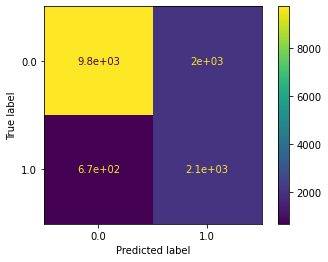

In [ ]:
plot_confusion_matrix(classifier, X_test, y_test) 

In [ ]:
print("Accuracy Metric", sklearn.metrics.accuracy_score(y_test, prediction))
print("Precision Metric", sklearn.metrics.precision_score(y_test, prediction))
print("Recall Metric", sklearn.metrics.recall_score(y_test, prediction))
print("F1 score", sklearn.metrics.f1_score(y_test, prediction))

Accuracy Metric 0.8632513943400124
Precision Metric 0.7463672391017173
Recall Metric 0.4136163982430454
F1 score 0.5322656617993405


Метод ближайших соседей

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
#Очень долго строится модель, всвязи с этим не смог сравнить зависимость рез-та от параметра n_neighbors
neigh = KNeighborsClassifier(n_neighbors=17)
neigh.fit(X_train, y_train)

prediction = neigh.predict(X_test)

prediction

array([0., 0., 0., ..., 0., 0., 0.])

0.86669420918543


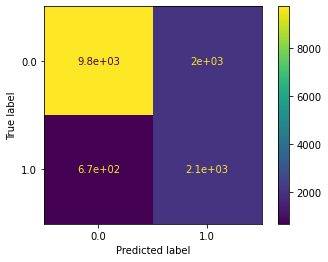

In [ ]:
print (np.mean(prediction == y_test))
plot_confusion_matrix(classifier, X_test, y_test) 

In [ ]:
print("Accuracy Metric", sklearn.metrics.accuracy_score(y_test, prediction))
print("Precision Metric", sklearn.metrics.precision_score(y_test, prediction))
print("Recall Metric", sklearn.metrics.recall_score(y_test, prediction))
print("F1 score", sklearn.metrics.f1_score(y_test, prediction))

Accuracy Metric 0.86669420918543
Precision Metric 0.7374701670644391
Recall Metric 0.45241581259150804
F1 score 0.5607985480943738


Логистическая регрессия

In [ ]:
#Попробум применить логистическую регресиию:
from sklearn.linear_model import LogisticRegression

classifier = LogisticRegression(penalty =  'l2', max_iter = 5000)
classifier.fit(X_train, y_train)
prediction = classifier.predict(X_test)

prediction

array([0., 0., 0., ..., 0., 0., 0.])

In [ ]:
print (np.mean(prediction == y_test))
print (classifier.score(X_test, y_test)) 

0.8799146181918337
0.8799146181918337


In [ ]:
from sklearn.metrics import confusion_matrix
print (confusion_matrix(y_test, prediction))

[[11311   480]
 [ 1264  1468]]


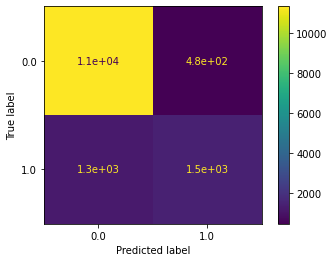

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import plot_confusion_matrix

plot_confusion_matrix(classifier, X_test, y_test) 
plt.show()

In [ ]:
print("Accuracy Metric", sklearn.metrics.accuracy_score(y_test, prediction))
print("Precision Metric", sklearn.metrics.precision_score(y_test, prediction))
print("Recall Metric", sklearn.metrics.recall_score(y_test, prediction))
print("F1 score", sklearn.metrics.f1_score(y_test, prediction))

Accuracy Metric 0.8799146181918337
Precision Metric 0.7535934291581109
Recall Metric 0.5373352855051244
F1 score 0.6273504273504273


# Вывод

Наивный Байес - 0.8136060042690904
>Accuracy Metric 0.8632513943400124

>Precision Metric 0.7463672391017173

>Recall Metric 0.4136163982430454

>F1 score 0.5322656617993405
>
Метод ближайших соседей - 0.86669420918543
>Accuracy Metric 0.86669420918543

>Precision Metric 0.7374701670644391

>Recall Metric 0.45241581259150804

>F1 score 0.5607985480943738
>
Логистическая регрессия - 0.8799146181918337
>
>Accuracy Metric 0.8799146181918337

>Precision Metric 0.7535934291581109

>Recall Metric 0.5373352855051244

>F1 score 0.6273504273504273
>
Лучший результат дает **логистическая регрессия** с параметром  max_iter = 5000